In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import clima_anom as ca
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

## Example for extract data using a shapefile

In [9]:
file_shape = '..'+os.sep+'shapefile'+os.sep+''+os.sep+'Amazonas.shp'
amazonas = list(shpreader.Reader(file_shape).geometries())

In [10]:
data_dir = '..'+os.sep+'data'+os.sep+'3B42_199901_201212_climatology.nc'
data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
pre = data['pre']

lat : (110,)
lon : (110,)
time : (12,)
pre : (12, 110, 110)


In [11]:
pre_amazonas = ca.extract_shapefile('..'+os.sep+'shapefile'+os.sep+'Amazonas.shp',pre,lat,lon,0)

Shapes ID len:  1


In [12]:
lon2d, lat2d = np.meshgrid(lon, lat)

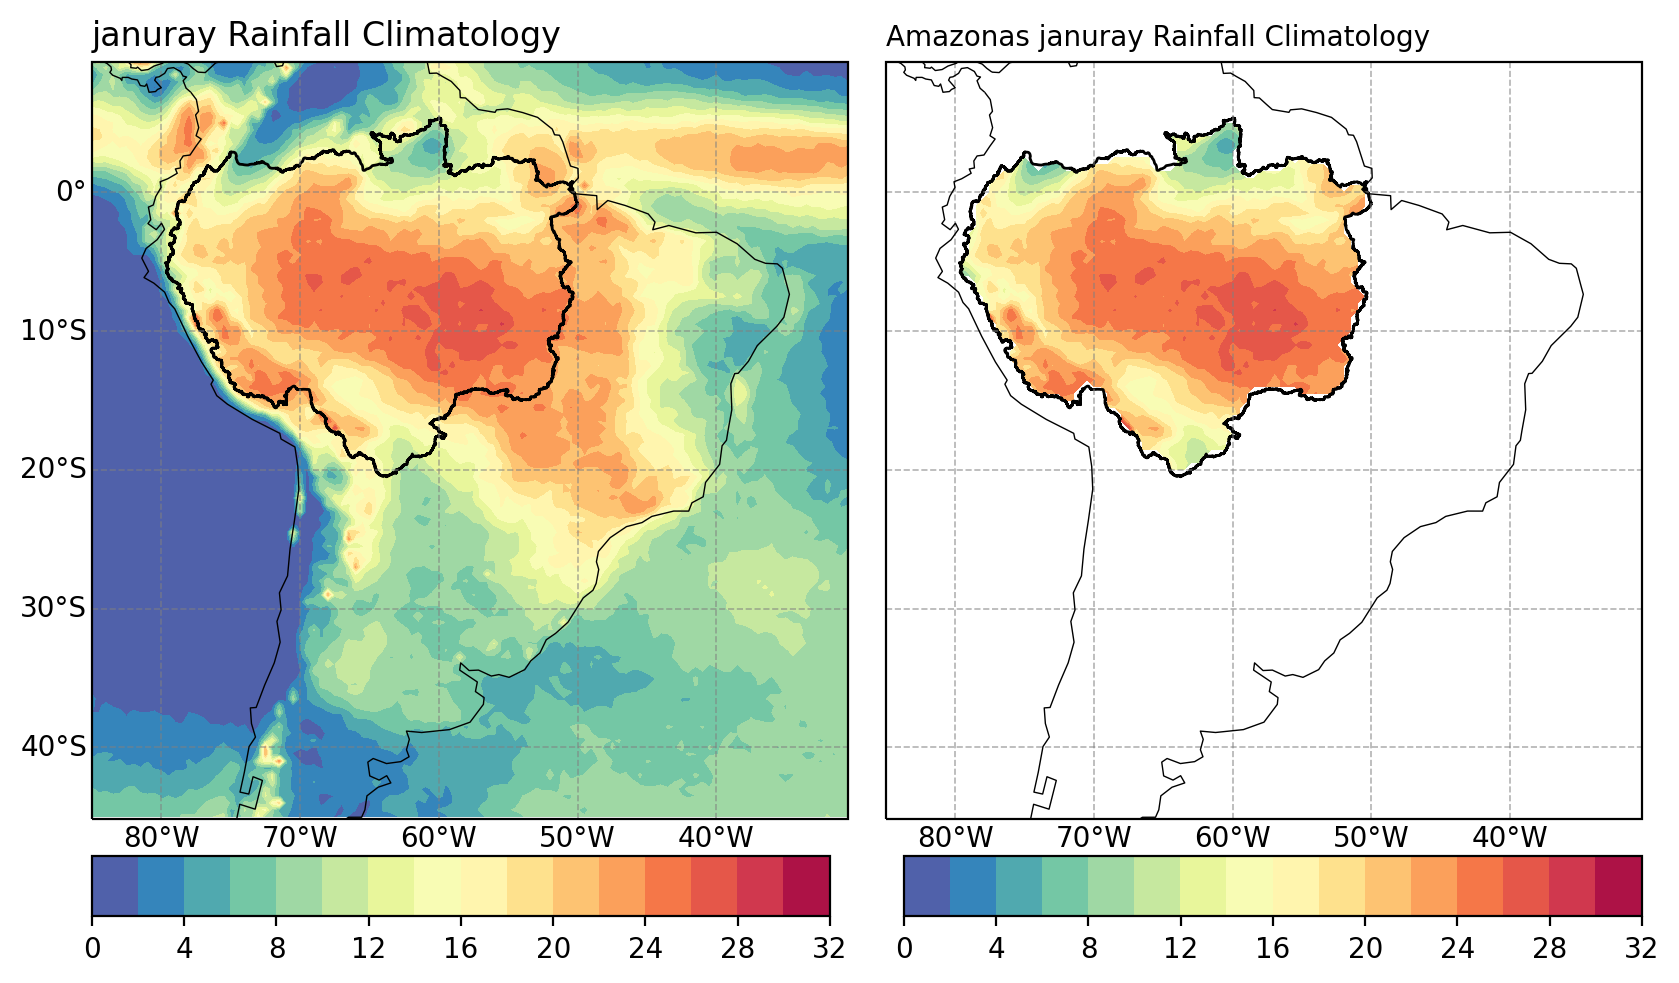

In [13]:
levels = np.arange(0,34,2)

cmap = plt.cm.Spectral_r
fig = plt.figure(figsize=(10,10),dpi=200)

proj = ccrs.PlateCarree()
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-85,-30.5,-42,8.5])
a1 = ax1.contourf(lon2d, lat2d, pre[0,:,:],levels=levels,cmap = cmap)
ax1.add_geometries(amazonas,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=1)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
ax1.set_title('januray Rainfall Climatology',fontsize= 12,loc='left')

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax2.set_extent([-85,-30.5,-42,8.5])
a2 = ax2.contourf(lon2d, lat2d, pre_amazonas[0,:,:],levels=levels,cmap = cmap)
ax2.add_geometries(amazonas,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=1)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
ax2.set_title('Amazonas januray Rainfall Climatology',fontsize= 10,loc='left')

cbaxes = fig.add_axes([0.125, 0.265, 0.369, 0.03]) 
cbar = fig.colorbar(a1, cax = cbaxes,orientation="horizontal",ticks=None)
cbar.ax.get_yaxis().labelpad = 15

cbaxes = fig.add_axes([0.531, 0.265, 0.369, 0.03]) 
cbar = fig.colorbar(a2, cax = cbaxes,orientation="horizontal",ticks=None)
cbar.ax.get_yaxis().labelpad = 15

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.1, wspace=0.05)

plt.savefig('..'+os.sep+'figures'+os.sep+'Extract_shapefile.png',transparent = False,bbox_inches ='tight',pad_inches = 0.1)